In [428]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv

import math

from scipy.special import expit

# Image manipulation library
from PIL import Image

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

np.seterr(all='ignore')

# http://scikit-learn.org/stable/tutorial/machine_learning_map/

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [429]:
# Load datasets and store in ndarray
raw_train = genfromtxt('usps-4-9-train.csv', delimiter=',')
raw_test = genfromtxt('usps-4-9-test.csv', delimiter=',')

In [3]:
# Split off known target values
y_train = raw_train[:,256]
y_test = raw_test[:,256]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 256 from X
raw_train = np.delete(raw_train, 256, axis=1)
raw_test = np.delete(raw_test, 256, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(raw_train)
dummy_test = make_dummy_vector(raw_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, raw_train), axis=1)
X_test = np.concatenate((dummy_test, raw_test), axis=1)

In [4]:
# Data for a single sample
print raw_train[0]

[   0.    0.    0.    0.    0.    0.    0.    0.   11.  133.  195.    7.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.  120.
  220.  255.  149.    2.    0.    0.    0.    0.    0.    0.    0.   20.
  113.  172.  239.  255.  255.   72.    0.    0.    0.    0.    0.    0.
    0.    0.  122.  255.  253.  174.  105.  155.  255.    3.    0.    0.
    0.    0.    0.    0.    0.   73.  243.  183.   17.    0.    0.  144.
  244.    2.    0.    0.    0.    0.   30.   28.    0.    0.    0.    0.
    0.    0.    0.   98.  201.    0.    0.   15.  102.  179.  255.  174.
    0.    0.    0.    0.    0.    0.    0.  155.  212.   90.  167.  253.
  255.  206.   94.   16.    0.    0.    0.    0.    0.    0.   25.  223.
  255.  239.  139.   64.   43.    0.    0.    0.    0.    0.    0.    0.
   37.  154.  251.  255.  166.   12.    0.    0.    0.    0.    0.    0.
    0.   22.  116.  205.  252.  173.   97.  255.  109.    0.    0.    0.
    0.    0.    0.    0.   90.  248.  198.   93.   

In [383]:
# Displays a single sample for context
def visualize_sample(data,target):
    temp = np.reshape(data[target],(16,16), order='F')
    img = Image.fromarray(temp)
    img.show()
    
# Example call to function
visualize_sample(raw_train, 1200)

In [238]:
# Calculate sigmoid function
def calc_sigmoid(target_function):
    return (1 / (1 + np.exp(-target_function)))

# Try to predict
def prediction(X,w):
    values = []
    for i in range(len(X)):      
        values.append(calc_sigmoid(np.dot(w.T,X[i])))
        
    fours = values[0:(len(X)/2)]
    nines = values[(len(X)/2):len(X)]
    ctr_four, ctr_nine = 0.0, 0.0
    
    for i in range(len(X)/2):
        if fours[i] == 0.0:
            ctr_four += 1
        if nines[i] == 1.0:
            ctr_nine += 1  
    return  ((ctr_four / (len(X)/2) * 100), (ctr_nine / (len(X)/2) * 100)) 
                

In [204]:
## Consider swapping order of bottom conditional, update to w should happend before break

def batch_learning(X, y, n, eta, epsilon = 0.001):
    accuracy = []
    length = len(X[0])
    w, old_d = np.zeros(length), np.zeros(length)
    ctr = 0
    while True:
        new_d = np.zeros(length)
        for i in range(n):
            y_hat_i = 1 / (1 + np.exp(-np.dot(w.T, X[i])))
            error = y[i] - y_hat_i
            new_d = np.add(new_d, error * X[i])
        d_norm = np.linalg.norm(old_d - new_d, 2)
        #print d_norm
        ctr = ctr + 1
        if d_norm < epsilon:
            break
        else:
            w, old_d = np.add(w, eta * new_d), new_d
            accuracy.append(prediction(X,w))
    return w, ctr, accuracy

In [438]:
learning_rates = np.linspace(0,0.3,100)
ctr_tally = []
acc_tally = []

for i in learning_rates:
    w, ctr, accuracy = batch_learning(X_train,y_train,1400,i)
    ctr_tally.append(ctr)
    acc_tally.append(accuracy)
    

In [435]:

print 'Learning rates:\r\n %s' % test


Learning rates:
 [ 0.     0.003  0.006  0.009  0.012  0.015  0.018  0.021  0.024  0.027
  0.03   0.033  0.036  0.039  0.042  0.045  0.048  0.052  0.055  0.058
  0.061  0.064  0.067  0.07   0.073  0.076  0.079  0.082  0.085  0.088
  0.091  0.094  0.097  0.1    0.103  0.106  0.109  0.112  0.115  0.118
  0.121  0.124  0.127  0.13   0.133  0.136  0.139  0.142  0.145  0.148
  0.152  0.155  0.158  0.161  0.164  0.167  0.17   0.173  0.176  0.179
  0.182  0.185  0.188  0.191  0.194  0.197  0.2    0.203  0.206  0.209
  0.212  0.215  0.218  0.221  0.224  0.227  0.23   0.233  0.236  0.239
  0.242  0.245  0.248  0.252  0.255  0.258  0.261  0.264  0.267  0.27
  0.273  0.276  0.279  0.282  0.285  0.288  0.291  0.294  0.297  0.3  ]


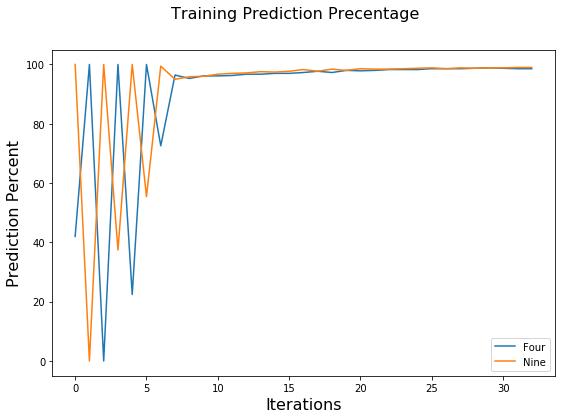

In [440]:
## PART 2
w_train = []
iter_train = []

# Begin training exercise with chosen learning rate
w, ctr, accuracy = batch_learning(X_train,y_train,1400,0.001)

# Unpack data
four_acc_per_epoch_train = []
nine_acc_per_epoch_train = []
for i,(a, b) in enumerate(acc_train):
    four_acc_per_epoch_train.append(a)
    nine_acc_per_epoch_train.append(b)

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(range(33),four_acc_per_epoch_train,label="Four")
plt.plot(range(33),nine_acc_per_epoch_train,label="Nine")
plt.legend()
fig.suptitle('Training Prediction Precentage', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Prediction Percent', fontsize=16)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in exp


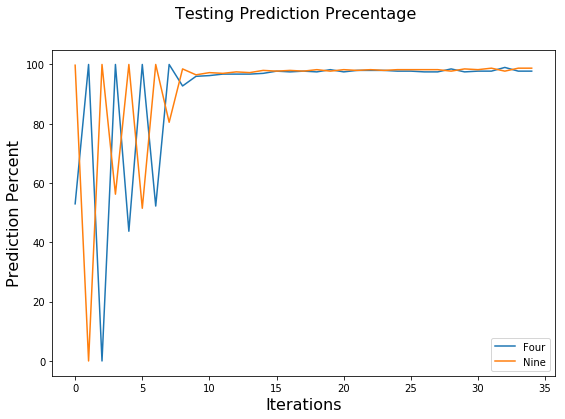

In [370]:
w_test = []
iter_test = []

w, ctr, accuracy = batch_learning(X_test,y_test,800,0.001)
w_test.append(w)
iter_test.append(ctr)
acc_test = accuracy

four_acc_per_epoch_test = []
nine_acc_per_epoch_test = []
for i,(a, b) in enumerate(acc_test):
    four_acc_per_epoch_test.append(a)
    nine_acc_per_epoch_test.append(b)
    
fig = plt.figure(figsize=(9,6))
plt.plot(range(35),four_acc_per_epoch_test,label="Four")
plt.plot(range(35),nine_acc_per_epoch_test,label="Nine")
plt.legend()
fig.suptitle('Testing Prediction Precentage', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Prediction Percent', fontsize=16)


In [418]:
print nine_acc_per_epoch_train
print four_acc_per_epoch_train

[98.57142857142858, 98.57142857142858, 98.71428571428571, 98.71428571428571, 98.0, 99.0, 100.0, 100.0, 100.0]
[96.28571428571429, 96.28571428571429, 96.42857142857143, 96.42857142857143, 95.14285714285714, 77.42857142857143, 0.0, 0.0, 0.0]


In [406]:
def batch_learning_reg(X, y, n, eta, lam,epsilon = 0.001):
    length = len(X[0])
    w, old_d = np.zeros(length), np.zeros(length)
    while True:
        new_d = np.zeros(length)
        for i in range(n):
            y_hat_i = 1 / (1 + np.exp(-np.dot(w.T, X[i])))
            error = y[i] - y_hat_i
            new_d = np.add(new_d, error * X[i])
        d_norm = np.linalg.norm(old_d - new_d, 2)
        if d_norm < epsilon:
            break
        else:
            w, old_d = np.add(np.add(w, eta * new_d), (lam * np.linalg.norm(w,2))) , new_d
    return w

In [407]:
## PART 4
# Experiment with the effect of regularization term
lambdas = [0.00000001,0.0000001,0.000001,0.000001,0.0001,0.001,0.01,0.1,1]
w_temp = []

# Loop through and run batch learning with lambdas
for i in lambdas:
    w  = batch_learning_reg(X_test,y_test,800,0.001,i)
    w_temp.append(w)
    
# Calculate prediction percentage
predictions_train = []
predictions_test = []

for i in range(len(w_temp)):
    predictions_train.append(prediction(X_train,w_temp[i]))
    predictions_test.append(prediction(X_test,w_temp[i]))

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in exp
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [409]:
# Grab prediction values for 4's and 9's
four_acc_per_epoch_train = []
nine_acc_per_epoch_train = []

for i,(a, b) in enumerate(predictions_train):
    four_acc_per_epoch_train.append(a)
    nine_acc_per_epoch_train.append(b)

four_acc_per_epoch_test = []
nine_acc_per_epoch_test = []
for i,(a, b) in enumerate(predictions_test):
    four_acc_per_epoch_test.append(a)
    nine_acc_per_epoch_test.append(b)

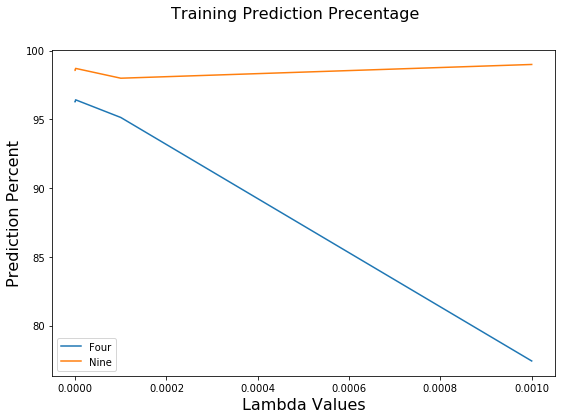

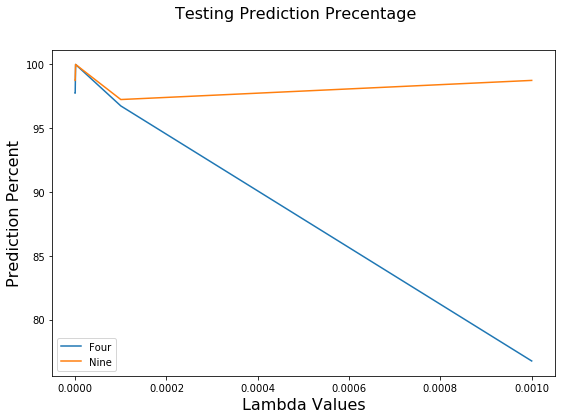

In [410]:
fig = plt.figure(figsize=(9,6))
plt.plot(lambdas[0:6],four_acc_per_epoch_train[0:6],label="Four")
plt.plot(lambdas[0:6],nine_acc_per_epoch_train[0:6],label="Nine")
plt.legend()
fig.suptitle('Training Prediction Precentage', fontsize=16)
plt.xlabel('Lambda Values', fontsize=16)
plt.ylabel('Prediction Percent', fontsize=16)

fig = plt.figure(figsize=(9,6))
plt.plot(lambdas[0:6],four_acc_per_epoch_test[0:6],label="Four")
plt.plot(lambdas[0:6],nine_acc_per_epoch_test[0:6],label="Nine")
plt.legend()
fig.suptitle('Testing Prediction Precentage', fontsize=16)
plt.xlabel('Lambda Values', fontsize=16)
plt.ylabel('Prediction Percent', fontsize=16)